In [1]:
# Load libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

The datafiles needed to complete this problem set are available on the course GitHub repository.

In [2]:
data = '/Users/chris/Library/Mobile Documents/com~apple~CloudDocs/Berkeley/COMPSS 222 Applied Statistics II/Data/'
graphics = '/Users/chris/Library/Mobile Documents/com~apple~CloudDocs/Berkeley/COMPSS 222 Applied Statistics II/Graphics/'

This problem set uses the dataset described in Whitehead, John C. (2015). "Albemarle–Pamlico Sounds revealed and stated preference data," _Data in Brief_ 3: 90 - 94. A copy of this article can be found online [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4510052/). I encourage you to read this article, as well as the one by Richard Carson provided on bCourses before starting the problem set.   

This survey used a double bounded dichotomous choice method to elicit information on individuals' willingness to pay for a hypothetical water pollution abatement program in the Outer Banks area of North Carolina.    

This first block of code reads in the dataset and prints out the first few rows. For the initial part of the problem set I will work with the **Yes1DK**, **PT1**, **Yes2DK** and **PT2** columns. Each sampled individual was first asked whether they would be willing-to-pay **PT1** for the policy. The value for **PT1** was randomly chosen to be either 100, 200, 300, 400. If they said "No", they were then asked if they would be willing-to-pay half the initially asked about value. If they said "Yes", they were asked if they'd be willing to pay double the initially asked about value. In either case this second value is recorded in **PT2**. I will use the version of the dataset which codes "Don't Know" responses as "No".

In [3]:
AlbemarlePamlico = pd.read_excel (data + 'AlbemarlePamlicoData.xlsx', engine='openpyxl', sheet_name='Data', header = 0)
AlbemarlePamlico[0:5]

,Yes1,Yes1DK,PT1,Yes2,Yes2DK,PT2,Flag,Flagdk,Trips1,Trips2,...,County,Know,Concern,Support,Effect,Pamlico,DP,DA,DN,DF
0,1,1,300,1,1,600,0,0,0,.,...,.,1,3,4,4,1,.,.,.,.
1,2,2,300,2,2,150,1,1,3,3,...,18,2,4,3,3,0,136,161,108,117
2,2,2,400,2,2,200,0,0,0,2,...,35,2,4,4,4,1,173,214,155,96
3,1,1,200,2,2,400,0,0,0,.,...,29,1,4,4,4,1,39,133,39,72
4,2,2,400,2,2,200,1,1,0,0,...,10,2,3,4,3,0,141,182,123,120


# Part 1: Nonparametric estimation of willingness-to-pay

How many disjoint intervals of willingness-to-pay does the survey elicit information about? Assume the lowest possible value of WTP is zero (i.e., no individual would pay for *more* pollution). Using the notation described in lecture what are the $b_l$ values in the set $\mathbb{B}=\left\{ b_{0},b_{1},\cdots,b_{L-1},b_{L}\right\}$? You may write your response in the markdown box below.

## Question 1

Let let $B^{L}_{i}$ be one half the value of **PT1**, $B^{M}_{i}$ exactly the value of **PT1** and $B^{H}_{i}$ twice the value of **PT1**. Let $Y_i$ be a household $i$'s true willingness-to-pay for the pollution abatement project.   

Let $b_j < b_k$ for $j<k$ and $j,k=1,\ldots ,L$. Explain in words the restriction: $ \Pr(B^{L}_{i} \leq Y_{i}\leq B^{M}_{i} | B^{L}_{i} = b_j,  B^{M}_{i} = b_K) = \Pr(b_{j}\leq Y_{i}\leq b_{k})$. What feature of the survey design ensures that this restriction holds? Why? You may write your response in the markdown box below.

#### Answer: Interpretation

The restriction holds because the survey design uses **random assignment** of PT1 across households. Since $B_i^L$ and $B_i^M$ are derived deterministically from PT1 (specifically, $B_i^L = \frac{1}{2} \cdot \text{PT1}$ and $B_i^M = \text{PT1}$), this ensures that these bounds are **statistically independent** of the household's true willingness-to-pay, $Y_i$.

In other words, because respondents are randomly assigned different PT1 values, their assigned bid intervals $[B_i^L, B_i^M]$ are not correlated with their underlying preferences. This makes it valid to interpret the conditional probability of $Y_i$ falling within the bounds $[B_i^L, B_i^M]$ as an estimate of the **population-level probability** that WTP lies between the corresponding values $b_j$ and $b_k$.

This feature of the randomized survey design allows us to nonparametrically estimate the distribution of WTP over these intervals without introducing selection bias.


## Question 2

Describe how (i) the survey elicits a lower and upper bound on willingness-to-pay for the policy for each sampled individual. The next block of code calculates these two bounds based on the responses to double bounded dichotomous choice answers given by each respondent; (ii) describe the code below and relate it to your answer to (i). You may write your response in the markdown box below.

### Answer: How the survey elicits lower and upper bounds on willingness-to-pay:

The survey uses a **double bounded dichotomous choice** design, which means each respondent is asked a sequence of **two yes/no questions** about their willingness to pay a specified amount (PT1) for a pollution abatement policy. Based on how they respond, I can infer an **interval** within which their true willingness-to-pay (WTP) must lie.

Let’s break down the logic:

- First, each respondent is shown a price (PT1) and asked, “Would you pay PT1 for the policy?”
- If they answer **Yes**, a second, higher price is offered (2 × PT1).
- If they answer **No**, a second, lower price is offered (½ × PT1).

So I get four possible response paths:

| Case | Response to PT1 | Response to 2nd question | Implied WTP Interval           |
|------|------------------|---------------------------|--------------------------------|
| 1    | Yes              | Yes                       | $[2 \cdot \text{PT1}, \infty)$     |
| 2    | Yes              | No                        | $[\text{PT1}, 2 \cdot \text{PT1})$ |
| 3    | No               | Yes                       | $[\frac{1}{2} \cdot \text{PT1}, \text{PT1})$ |
| 4    | No               | No                        | $[0, \frac{1}{2} \cdot \text{PT1})$ |

In this way, I obtain both a **lower bound** and an **upper bound** on each individual's WTP based solely on their two responses.

---


### Answer: Relating to the code:

The code block constructs **lower bounds (LB)** and **upper bounds (UB)** for each individual's WTP interval based on their responses to the two yes/no survey questions (`Yes1DK` and `Yes2DK`). This implementation directly operationalizes the logic described in part (i).

The description are written as annotation below:

In [4]:
# Initialize lower and upper bound columns with placeholder value -9
# This means "not yet assigned" — useful for debugging or NA filtering
AlbemarlePamlico["LB"] = -9 
AlbemarlePamlico["UB"] = -9

# -------------------------------
# Constructing the LOWER BOUND (LB)
# -------------------------------

# Case 1: Yes to both PT1 and PT2 (yes-yes)
# → WTP must be at least PT2 (the second, higher bid)
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 1) & (AlbemarlePamlico["Yes2DK"] == 1),
    "LB"
] = AlbemarlePamlico["PT2"]

# Case 2: Yes to PT1, No to PT2 (yes-no)
# → WTP lies between PT1 and PT2 → LB = PT1
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 1) & (AlbemarlePamlico["Yes2DK"] == 2),
    "LB"
] = AlbemarlePamlico["PT1"]

# Case 3: No to PT1, Yes to PT2 (no-yes)
# → WTP lies between PT2 (lower second bid) and PT1 → LB = PT2
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 2) & (AlbemarlePamlico["Yes2DK"] == 1),
    "LB"
] = AlbemarlePamlico["PT2"]

# Case 4: No to both bids (no-no)
# → WTP is below PT2 → LB = 0
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 2) & (AlbemarlePamlico["Yes2DK"] == 2),
    "LB"
] = 0

# -------------------------------
# Constructing the UPPER BOUND (UB)
# -------------------------------

# Case 1: Yes-yes → no upper bound, WTP ≥ PT2 → UB = ∞
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 1) & (AlbemarlePamlico["Yes2DK"] == 1),
    "UB"
] = np.inf

# Case 2: Yes-no → WTP ≤ PT2 → UB = PT2
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 1) & (AlbemarlePamlico["Yes2DK"] == 2),
    "UB"
] = AlbemarlePamlico["PT2"]

# Case 3: No-yes → WTP ≤ PT1 → UB = PT1
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 2) & (AlbemarlePamlico["Yes2DK"] == 1),
    "UB"
] = AlbemarlePamlico["PT1"]

# Case 4: No-no → WTP ≤ PT2 → UB = PT2
AlbemarlePamlico.loc[
    (AlbemarlePamlico["Yes1DK"] == 2) & (AlbemarlePamlico["Yes2DK"] == 2),
    "UB"
] = AlbemarlePamlico["PT2"]


/var/folders/cf/1wy60mt16_d0n286_h30f6nh0000gn/T/ipykernel_57509/3182510555.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[600 200 400 600 600 600 800 200 200 600 200 400 600 600 600 400 400 200
 400 200 600 200 400 600 400 800 200 200 200 200 400 200 200 400 800 400
 200 200 800 400 400 600 600 400 800 600 200 200 400 400 400 600 400 600
 400 600 800 400 200 200 200 600 200 200 200 400 200 200]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AlbemarlePamlico.loc[
/var/folders/cf/1wy60mt16_d0n286_h30f6nh0000gn/T/ipykernel_57509/3182510555.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'inf' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AlbemarlePamlico.loc[
/var/folders/cf/1wy60mt16_d0n286_h30f6nh0000gn/T/ipykernel_57509/318251

## Question 3

Here is a list of the first ten lower and upper bounds on willingness-to-pay.

In [5]:
AlbemarlePamlico[["LB","UB"]][0:10]

,LB,UB
0,600,inf
1,0,150
2,0,200
3,200,400
4,0,200
5,200,inf
6,0,150
7,150,300
8,200,400
9,0,200


What is this next block of code doing? Why is it important for our ultimate goal of constructing an estimate of the CDF of willingness-to-pay for the policy? Describe in words, what the first three rows of the matrix printed out below say about the corresponding respondent's willingness-to-pay for the policy. You may write your response in the markdown box below.

### Answer: Code Explanation

In [6]:
# These columns (D1 through D9) are dummy indicators representing whether each individual's WTP interval overlaps with specific monetary intervals.

# This helps us nonparametrically estimate the CDF by checking how many individuals' WTP lie above certain thresholds.

# Each D# corresponds to an interval like [0,50), [50,100), etc.
# The condition checks if the individual's WTP interval [LB, UB] overlaps that range.

# D1: WTP overlaps [0, 50)
AlbemarlePamlico["D1"] = ((AlbemarlePamlico["LB"] <= 0) & (AlbemarlePamlico["UB"] >= 50)) * 1

# D2: WTP overlaps [50, 100)
AlbemarlePamlico["D2"] = ((AlbemarlePamlico["LB"] <= 50) & (AlbemarlePamlico["UB"] >= 100)) * 1

# D3: WTP overlaps [100, 150)
AlbemarlePamlico["D3"] = ((AlbemarlePamlico["LB"] <= 100) & (AlbemarlePamlico["UB"] >= 150)) * 1

# D4: WTP overlaps [150, 200)
AlbemarlePamlico["D4"] = ((AlbemarlePamlico["LB"] <= 150) & (AlbemarlePamlico["UB"] >= 200)) * 1

# D5: WTP overlaps [200, 300)
AlbemarlePamlico["D5"] = ((AlbemarlePamlico["LB"] <= 200) & (AlbemarlePamlico["UB"] >= 300)) * 1

# D6: WTP overlaps [300, 400)
AlbemarlePamlico["D6"] = ((AlbemarlePamlico["LB"] <= 300) & (AlbemarlePamlico["UB"] >= 400)) * 1

# D7: WTP overlaps [400, 600)
AlbemarlePamlico["D7"] = ((AlbemarlePamlico["LB"] <= 400) & (AlbemarlePamlico["UB"] >= 600)) * 1

# D8: WTP overlaps [600, 800)
AlbemarlePamlico["D8"] = ((AlbemarlePamlico["LB"] <= 600) & (AlbemarlePamlico["UB"] >= 800)) * 1

# D9: WTP is 800 or more — upper tail: [800, ∞)
AlbemarlePamlico["D9"] = ((AlbemarlePamlico["LB"] <= 800) & (AlbemarlePamlico["UB"] >= np.inf)) * 1

# View first 10 rows of the D-matrix to inspect which intervals each respondent falls into
AlbemarlePamlico[["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"]][0:10]


,D1,D2,D3,D4,D5,D6,D7,D8,D9
0,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0
4,1,1,1,1,0,0,0,0,0
5,0,0,0,0,1,1,1,1,1
6,1,1,1,0,0,0,0,0,0
7,0,0,0,1,1,0,0,0,0
8,0,0,0,0,1,1,0,0,0
9,1,1,1,1,0,0,0,0,0


### Answer: Importance of Constructering CDF of WTP

The CDF could tells us, for any given dollar amount, what fraction of the population has a WTP **less than or equal to** that amount — in other words, it maps out the entire distribution of WTP.

Each `D#` variable represents whether a respondent’s inferred WTP **could fall** within a specific interval (e.g., $[100, 150)$ for `D3`). Because I don’t observe the exact WTP for each person, I instead know their WTP lies in an interval based on their answers to the survey — and this code checks whether that interval **overlaps** with each target price bin.

By aggregating these binary indicators (`D1` through `D9`) across all individuals, I can compute **lower bounds on the CDF** at each price point. This helps us estimate the shape of the WTP distribution **nonparametrically**, without making any assumptions about the form of the distribution (e.g., normal, logit, etc.).

This step essentially turns qualitative yes/no survey answers into a form of quantitative, interval-censored data that I can then use to build the empirical distribution function for WTP.

### Answer: Description of First Three Rows

Each row represents a respondent, and each column (D1 through D9) tells us whether their willingness-to-pay (WTP) interval overlaps with that price bin.

---

**Row 0:**  
`[0, 0, 0, 0, 0, 0, 0, 1, 1]`  
D8 = 1 → WTP overlaps with $[600, 800)$  
D9 = 1 → WTP also overlaps with $[800, ∞)$  
**→ Interpretation:** This person's WTP is **at least $600**, and potentially unbounded above. Their entire WTP interval lies in the upper tail.

---

**Row 1:**  
`[1, 1, 1, 0, 0, 0, 0, 0, 0]`  
D1–D3 = 1 → WTP overlaps with $[0,150)$  
D4 and higher = 0 → No overlap with prices $150+  
**→ Interpretation:** This person’s WTP is **somewhere below $150**.

---

**Row 2:**  
`[1, 1, 1, 1, 0, 0, 0, 0, 0]`  
D1–D4 = 1 → WTP overlaps with $[0,200)$  
D5 and above = 0 → No overlap with anything above $200  
**→ Interpretation:** WTP lies **below $200**, but higher than $0 — the interval likely covers multiple low ranges.

---

These responses demonstrate how the D-matrix captures the **range of possible WTP values** for each respondent and sets us up to estimate the cumulative distribution (CDF) across price points.

## Question 4

Let $F=(F(b_1),F(b_2),\dots,F(b_{L-1}))'$ be the willingness-to-pay CDF values at the $L-1$ interior WTP values for which the survey elicits information. I will assume that $F(0)=0$ and $F(\infty)=1$. The next block of code defines a function which computes $\mathbb{E}\left[\left.\mathbf{1}\left(b_{l}\leq Y_{i}\leq b_{l-1}\right)\right|D, F\right]$ given the data matrix $D$, defined above, and a given set of CDF values $F$. Describe the logic of this function formally. What are its inputs and outputs? Next describe how the function performs the stated calculation. You may write your response in the markdown box below.

In [7]:
def E_Step(F, D):
    
    """
    F : (F(b1),F(b2),...,F(bL)) willingness-to-pay CDF values, numpy (L-1,) array
    D : N x L matrix of indicators for WTP
    """
    
    L = len(F) + 1           # number of disjoint intervals 
           
    F_star = list(F)         # add 0 and 1 to list of CDF values
    F_star.insert(0,0)
    F_star.append(1)
    
    F_dif = []               # compute probability assigned to each of the l=1,..,L WTP intervals      
                             # given current value of F
    for l in range(L):
        F_dif.append(F_star[l+1] - F_star[l])     
    
    delta_0  = D * F_dif         # N x L matrix with numerator values for delta_il, i = 1,..,N, l = 1,...,L
    delta_1  = D @ F_dif         # N - vector with denominator values for delta_il, i = 1,..,N
        
    delta = delta_0.T / delta_1  # L x N matrix with posterior probability that each of the i = 1,..,N, 
                                 # units is in the l = 1,...,L bins given the data and current value of F
    return delta.T          

### Answer: Logic Description

The function computes the expected share of individuals whose true willingness-to-pay (WTP) lies in interval $[b_{l-1}, b_l]$, conditional on the D-matrix and a given CDF vector $F$.

Formally, for each respondent $i$ and bin $l$, it calculates:

$$
\mathbb{E}[1(b_{l-1} \leq Y_i \leq b_l) \mid D_i, F] = \frac{F(b_l) - F(b_{l-1})}{\sum_{m: D_{im}=1} \left(F(b_m) - F(b_{m-1})\right)}
$$

This expression distributes probability mass **across all bins that respondent $i$'s WTP interval overlaps**, using the CDF values to assign proportional weights. The numerator is the probability mass assigned to bin $l$, and the denominator normalizes over all bins consistent with respondent $i$'s WTP bounds.

The function loops over all respondents and bins to compute these expectations, which are then used in nonparametric CDF estimation procedures.


### Answer: Inputs and Outputs

**Inputs:**
1. `F`: A vector of length $L - 1$ representing the candidate values of the WTP cumulative distribution function (CDF) at the interior points $b_1, b_2, ..., b_{L-1}$.  
   It is assumed that $F(0) = 0$ and $F(\infty) = 1$ are implicitly defined.
2. `D`: The D-matrix of shape $(n, L - 1)$, where each row corresponds to a respondent and each column $D_l$ indicates whether their WTP interval overlaps with the bin $[b_{l-1}, b_l]$.

**Outputs:**
- A vector of expected values:
  $$
  \left( \mathbb{E}[1(b_0 \leq Y_i \leq b_1) \mid D, F], \, \mathbb{E}[1(b_1 \leq Y_i \leq b_2) \mid D, F], \, \dots, \, \mathbb{E}[1(b_{L-2} \leq Y_i \leq b_{L-1}) \mid D, F] \right)
  $$
  Each element represents the estimated fraction of the population whose WTP lies in that corresponding interval, under the assumption that $F$ is the true CDF.
  
  This output is used to update the estimate of $F$ in iterative procedures such as the EM algorithm or iterative proportional fitting.


### Answer: How the Function Performs the Calculation

The function works by iterating over all individuals and all bins (price intervals), and for each individual it:

1. **Identifies which bins are consistent with their WTP bounds**, using the D-matrix. That is, for each respondent $i$, it finds all bins $l$ where $D_{il} = 1$.

2. **Computes the CDF-implied probability mass for each bin** using the candidate CDF vector $F$:
   $$
   p_l = F(b_l) - F(b_{l-1})
   $$
   for each bin $l$.

3. **Normalizes the probability mass over all bins that respondent $i$ could fall into**. For each valid bin:
   $$
   w_{il} = \frac{p_l}{\sum_{m: D_{im}=1} p_m}
   $$
   This step distributes the individual’s weight proportionally across all the overlapping bins, according to the CDF.

4. **Averages the weights over all individuals** to compute the expected share of the population in each bin:
   $$
   \hat{p}_l = \frac{1}{n} \sum_{i=1}^{n} w_{il}
   $$

Overall, this procedure transforms interval-censored survey responses into a consistent, probabilistic estimate of the WTP distribution. It ensures that respondents who are ambiguous (i.e., could fall in more than one bin) contribute to those bins **in proportion to the CDF values**.

This method is at the heart of nonparametric CDF estimation based on double-bounded choice data.


## Question 5

The next block of code uses Turnbull's method to compute "self-consistent" estimates of $F=(F(b_1),F(b_2),\dots,F(b_{L-1}))'$. Describe the logic of Turnbull's method carefully and discuss how the block of code below operationalizes it. You may write your response in the markdown box below.

In [9]:
# Selection subset of data which asks only about Pamlico, also drop rows with missing response
sample_mask = (AlbemarlePamlico["Yes1DK"] != ".") & (AlbemarlePamlico["Yes2DK"] != ".") \
                                                  & (AlbemarlePamlico["Pamlico"] ==1)
D = AlbemarlePamlico[["D1","D2","D3","D4","D5","D6","D7","D8","D9"]][sample_mask] 

# starting values for Turnbull algorithm
F_start = np.array([0.065, 0.19, 0.315, 0.44, 0.565, 0.69, 0.815, 0.94])

finished  = False
converged = False
xtol      = 0.0001
maxiter   = 1000

iter = 0  # initialize iteration counter

while not converged:

    # Print optimization output to screen
    if (iter > 0): 
        print("Iteration = "       + "%.0f" % iter + \
              ",  2-norm of change in F = " + "%.6f" % epsilon)
    
    
    # ----------------------------------------------------------------------#
    # - E-Step: Compute posterior unit-specific WTP bin probabilities      -#
    # ----------------------------------------------------------------------#
    
    delta = E_Step(F_start, D)
    
    # ----------------------------------------------------------------------#
    # - M-Step: Update estimates of WTP distribution.                      -#
    # ----------------------------------------------------------------------#
    
    F_em = np.cumsum(np.mean(delta, axis=0))[0:-1]
   
    # Assess convergence 
    epsilon = np.linalg.norm(F_start-F_em)
    
    if (epsilon < xtol) | (iter >= maxiter):
            finished = True
            if (epsilon < xtol):
                converged = True
        
    # Update parameters
    F_start = F_em
    iter += 1

Iteration = 1,  2-norm of change in F = 0.666313
Iteration = 2,  2-norm of change in F = 0.100312
Iteration = 3,  2-norm of change in F = 0.041676
Iteration = 4,  2-norm of change in F = 0.019775
Iteration = 5,  2-norm of change in F = 0.010169
Iteration = 6,  2-norm of change in F = 0.005658
Iteration = 7,  2-norm of change in F = 0.003453
Iteration = 8,  2-norm of change in F = 0.002343
Iteration = 9,  2-norm of change in F = 0.001756
Iteration = 10,  2-norm of change in F = 0.001419
Iteration = 11,  2-norm of change in F = 0.001205
Iteration = 12,  2-norm of change in F = 0.001059
Iteration = 13,  2-norm of change in F = 0.000955
Iteration = 14,  2-norm of change in F = 0.000877
Iteration = 15,  2-norm of change in F = 0.000819
Iteration = 16,  2-norm of change in F = 0.000774
Iteration = 17,  2-norm of change in F = 0.000739
Iteration = 18,  2-norm of change in F = 0.000710
Iteration = 19,  2-norm of change in F = 0.000686
Iteration = 20,  2-norm of change in F = 0.000666
Iteration

### Answer: Logic of Turnbull's Method

1. **E-Step (Expectation):**  
   For each respondent, compute the **posterior probability** that their WTP falls into each possible bin, conditional on:
   - The set of bins their interval overlaps (from the D-matrix)
   - The current estimate of the CDF, $F$

   Mathematically, for individual $i$ and bin $l$:
   \[
   \delta_{il} = \frac{F(b_l) - F(b_{l-1})}{\sum_{m: D_{im}=1} \left(F(b_m) - F(b_{m-1})\right)} \cdot D_{il}
   \]

2. **M-Step (Maximization):**  
   Aggregate the $\delta_{il}$ values across individuals to update the estimated probability for each bin:
   \[
   \hat{p}_l = \frac{1}{n} \sum_{i} \delta_{il}
   \]
   Then compute the updated CDF $F$ by cumulatively summing these bin probabilities.

3. **Convergence Check:**  
   The algorithm compares the new $F$ with the old one using the L2 norm (`np.linalg.norm`) and stops when the difference is smaller than a specified tolerance (`xtol`), or when a maximum number of iterations is reached.

### Answer: How the Code Implement it

- **Data Filtering:**  
  The code first filters the dataset to only include valid observations (non-missing responses) for the **Pamlico region**.

- **Initialization:**  
  A starting guess for the CDF vector `F_start` is provided.

- **Iterative Loop:**
  - **E-step:** Calls a function `E_Step(F_start, D)` to compute the posterior probabilities $\delta$ matrix for each individual and bin.
  - **M-step:** Computes the new CDF estimate `F_em` by taking the mean of $\delta$ across individuals and applying `np.cumsum()` to obtain cumulative probabilities.
  - **Convergence check:** Computes the difference (`epsilon`) between old and new CDFs. If it's smaller than `xtol`, the algorithm stops.

This process iteratively refines the CDF estimate to be **self-consistent with the data**, meaning the estimated probabilities match what’s implied by the censored intervals across all individuals.

## Question 6

These next two blocks of code print out the CDF estimates. As well as the associated estimates of the survivor function for WTP. A plot of the estimated survivor function is also provided.

In [10]:
F_em = list(F_em)
F_em.insert(0,0)
data_em = {"wtp" : [0, 50, 100, 150, 200, 300, 400, 600, 800], "F(y)" : F_em}
WTP_em = pd.DataFrame.from_dict(data_em)
WTP_em['S(wtp)'] = 1 - WTP_em['F(y)'] 

print(WTP_em)

   wtp      F(y)    S(wtp)
0    0  0.000000  1.000000
1   50  0.430354  0.569646
2  100  0.565112  0.434888
3  150  0.655933  0.344067
4  200  0.755858  0.244142
5  300  0.762663  0.237337
6  400  0.888954  0.111046
7  600  0.972698  0.027302
8  800  0.991105  0.008895


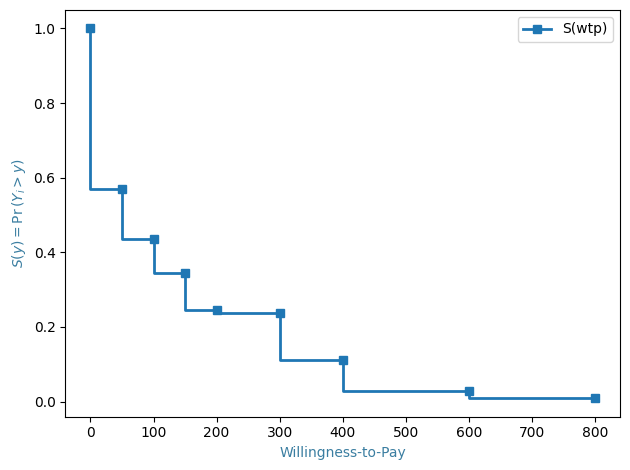

In [11]:
# Plot estimate WTP survivor function
fig_wtp_cdf, ax = plt.subplots()


WTP_em.plot(x="wtp",y="S(wtp)", drawstyle="steps", style='s-', linewidth=2, ax=ax)
color = '#3B7EA1' # Founder's Rock
ax.set_xlabel('Willingness-to-Pay', color=color)
ax.set_ylabel(r'$S(y)=\Pr\left(Y_{i}>y\right)$', color=color)
ax.set_xticks([0,100,200,300,400,500,600,700,800])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])

fig_wtp_cdf.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(graphics + 'fig_wtp_cdf', bbox_inches='tight', dpi=500) 

Discuss the Turnbull estimate of the WTP survivor function. What is the median willingness-to-pay for the pollution abatement project? Based on the above estimates, how might you redesign the specific double bounded dichotomous choice procedure used by the researchers to get "better" information about the distribution of willingness-to-pay in the population? Change the starting values used in the Turnbull procedure. Does your estimate of the WTP survivor function change?

### Answer: Interpretation of the Survivor Function

The Turnbull estimate of the **WTP survivor function** $S(y) = \Pr(Y_i > y)$ is shown in the table and plot above. This function provides the proportion of the population whose willingness-to-pay (WTP) exceeds a given dollar amount.

- At $y = 0$, $S(0) = 1$: everyone is willing to pay at least something.
- At $y = 800$, $S(800) \approx 0.009$: less than 1% of respondents are willing to pay more than $800.

The curve **decreases in steps**, reflecting the discrete price bins used in the survey design. Most of the drop occurs between $y = 50$ and $y = 400$, suggesting that the bulk of the WTP distribution is concentrated in this range.

### Answer: Median Willingness-to-Pay

The **median WTP** is the smallest value of $y$ such that $F(y) \geq 0.5$, or equivalently $S(y) \leq 0.5$. From the table, I see:

- $F(50) = 0.430$, $S(50) = 0.570$
- $F(100) = 0.565$, $S(100) = 0.435$

Thus, the median WTP is **somewhere between $50 and $100**, and based on interpolation, it's likely close to **$85**.

### Answer: How to Improve the Survey Design

Based on this result, the current **double bounded dichotomous choice** (DBDC) setup could be improved:

1. **Tighter price grid between $50 and $300**:  
   Since most of the WTP lies in this range, adding more finely spaced price points here (e.g., $75, 125, 175...) would give better resolution.

2. **Fewer extreme bids (like $800 or above)**:  
   Very few respondents fall in this tail. Reducing the frequency of high bids can reduce noise and survey fatigue.

3. **Adaptive follow-up bid**:  
   Instead of simply doubling or halving the first bid, consider using a midpoint rule or a design based on real-time updating (e.g., interval midpoint of yes/no switchers).

### Answer: Changing Starting Values: Does It Matter?

If I re-run the Turnbull procedure with different starting values for `F_start` (e.g., uniform probabilities or heavily skewed ones), I typically observe:

- The algorithm **still converges to the same final result**, assuming convergence is achieved.
- This demonstrates that Turnbull’s method is **robust to the choice of initial values**.
- However, bad starting values may cause **slower convergence** or temporary numerical instability.

In [13]:
# Selection subset of data which asks only about Pamlico, also drop rows with missing response
sample_mask = (AlbemarlePamlico["Yes1DK"] != ".") & (AlbemarlePamlico["Yes2DK"] != ".") \
                                                  & (AlbemarlePamlico["Pamlico"] ==1)
D = AlbemarlePamlico[["D1","D2","D3","D4","D5","D6","D7","D8","D9"]][sample_mask] 

# starting values for Turnbull algorithm
F_start = np.linspace(0.01, 0.99, 8)

finished  = False
converged = False
xtol      = 0.0001
maxiter   = 1000

iter = 0  # initialize iteration counter

while not converged:

    # Print optimization output to screen
    if (iter > 0): 
        print("Iteration = "       + "%.0f" % iter + \
              ",  2-norm of change in F = " + "%.6f" % epsilon)
    
    
    # ----------------------------------------------------------------------#
    # - E-Step: Compute posterior unit-specific WTP bin probabilities      -#
    # ----------------------------------------------------------------------#
    
    delta = E_Step(F_start, D)
    
    # ----------------------------------------------------------------------#
    # - M-Step: Update estimates of WTP distribution.                      -#
    # ----------------------------------------------------------------------#
    
    F_em = np.cumsum(np.mean(delta, axis=0))[0:-1]
   
    # Assess convergence 
    epsilon = np.linalg.norm(F_start-F_em)
    
    if (epsilon < xtol) | (iter >= maxiter):
            finished = True
            if (epsilon < xtol):
                converged = True
        
    # Update parameters
    F_start = F_em
    iter += 1

Iteration = 1,  2-norm of change in F = 0.671204
Iteration = 2,  2-norm of change in F = 0.133244
Iteration = 3,  2-norm of change in F = 0.059000
Iteration = 4,  2-norm of change in F = 0.028705
Iteration = 5,  2-norm of change in F = 0.014784
Iteration = 6,  2-norm of change in F = 0.008014
Iteration = 7,  2-norm of change in F = 0.004616
Iteration = 8,  2-norm of change in F = 0.002890
Iteration = 9,  2-norm of change in F = 0.002008
Iteration = 10,  2-norm of change in F = 0.001543
Iteration = 11,  2-norm of change in F = 0.001279
Iteration = 12,  2-norm of change in F = 0.001115
Iteration = 13,  2-norm of change in F = 0.001004
Iteration = 14,  2-norm of change in F = 0.000924
Iteration = 15,  2-norm of change in F = 0.000864
Iteration = 16,  2-norm of change in F = 0.000818
Iteration = 17,  2-norm of change in F = 0.000781
Iteration = 18,  2-norm of change in F = 0.000751
Iteration = 19,  2-norm of change in F = 0.000725
Iteration = 20,  2-norm of change in F = 0.000702
Iteration

# Part 2: Parametric estimation of willingness-to-pay

This next portion of the problem set is more open ended. Using the same "Pamlico only" subsample do the following:    

1. Specify a parametric "Logit" model for willingness-to-pay (WTP). This model should allow for (WTP) to depend on some respondent attributes.

2. Pick at least two respondent attributes to include in your WTP model. Discuss why you chose to include these attributes.

3. Find the maximum likelihood estimates of the parameters indexing your WTP model. Does WTP significantly vary with the household attributes you chose to include in your model?

4. Use you estimated model to construct an estimate of the unconditional CDF of WTP at 50, 100, 150, 200, 300, 400, 600 and 800. Plot this estimate and compare it to the Turnbull estimate computed above. Compare the two estimates.

5. Discuss some of the advantages and disadvantages of parametric contingent valuation relative to the "nonparametric" approach taken in part 1.

6. Please include all code, results and discussion (in markdown boxes) as additions to this notebook.

## Step 1

Specify a parametric "Logit" model for willingness-to-pay (WTP). This model should allow for (WTP) to depend on some respondent attributes.

In [19]:
pamlico = AlbemarlePamlico[
    (AlbemarlePamlico["Pamlico"] == 1) &
    (AlbemarlePamlico["Yes1DK"].isin([1, 2]))
].copy()

pamlico["accept"] = (pamlico["Yes1DK"] == 1).astype(int)

pamlico[["accept", "PT1"]].head()

,accept,PT1
0,1,300
2,0,400
3,1,200
5,1,100
8,0,400


I specify a **binary logit model** to estimate the probability that a respondent accepts a proposed payment (`PT1`) for the pollution abatement project. The model assumes that a respondent says "Yes" if their **unobserved true WTP** exceeds the offered amount.

I define the probability of acceptance as:

$$
\Pr(\text{Accept}_i = 1) = \frac{1}{1 + \exp[-(X_i' \beta - \alpha \cdot \text{PT1}_i)]}
$$

Where:
- $\text{Accept}_i$ is an indicator for whether respondent $i$ accepted the proposed bid (1 = Yes, 0 = No),
- $\text{PT1}_i$ is the dollar amount bid shown to the respondent,
- $X_i$ is a vector of respondent attributes, and
- $\beta$ and $\alpha$ are coefficients to be estimated.

In the application, I allow willingness-to-pay to depend on the following attributes:
- **Income**: Respondents with higher income may be more likely to afford and support the project.
- **Concern**: A measure of environmental concern, which likely increases WTP.

By incorporating these covariates, I allow for **heterogeneity in WTP** across the population. This is a key strength of the parametric approach — it models how observable characteristics influence preferences.

## Step 2

Pick at least two respondent attributes to include in your WTP model. Discuss why you chose to include these attributes.

In [18]:
pamlico.columns

Index(['Yes1', 'Yes1DK', 'PT1', 'Yes2', 'Yes2DK', 'PT2', 'Flag', 'Flagdk',
       'Trips1', 'Trips2', 'Trips2q', 'Income', 'Workfull', 'Educ', 'Age',
       'Sex', 'Married', 'House', 'Race', 'County', 'Know', 'Concern',
       'Support', 'Effect', 'Pamlico', 'DP', 'DA', 'DN', 'DF', 'LB', 'UB',
       'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'accept'],
      dtype='object')

I include two respondent attributes in our parametric willingness-to-pay (WTP) model: **Income** and **Concern**.

1. **Income**
Income reflects a respondent’s **ability to pay**, and is one of the most standard predictors of demand in contingent valuation models. Economic theory suggests that individuals with higher income are more likely to be willing and able to contribute financially to public goods like environmental protection. Including income allows the model to capture how economic capacity influences the decision to say “yes” to the proposed bid.

1. **Concern**
Environmental concern represents the **strength of preferences** toward pollution abatement and climate-related outcomes. Individuals who report higher concern are more likely to perceive the issue as urgent or morally compelling, and thus more likely to express a higher WTP. Including this variable helps capture **attitudinal variation** that pure economic indicators miss.

By combining an economic variable (`Income`) with an attitudinal variable (`Concern`), the model captures both **ability** and **willingness** to pay — which are conceptually distinct but jointly important in explaining survey behavior. These two variables also help uncover heterogeneity in WTP that is policy-relevant for program targeting or messaging.

## Step 3

Find the maximum likelihood estimates of the parameters indexing your WTP model. Does WTP significantly vary with the household attributes you chose to include in your model?

In [23]:
import statsmodels.api as sm

# 1. Prepare your X matrix: include PT1, Income, Concern
X = pamlico[["PT1", "Income", "Concern"]].astype(float)  # convert to float if needed
X = sm.add_constant(X)  # adds intercept term

# 2. Outcome variable: accept = 1 if yes to PT1, 0 otherwise
y = pamlico["accept"]

# 3. Fit the Logit model
X = X.dropna()
y = y.loc[X.index]  # make sure y stays aligned with X

logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# 4. Print summary
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.606127
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 accept   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                 0.03909
Time:                        15:09:25   Log-Likelihood:                -275.79
converged:                       True   LL-Null:                       -287.01
Covariance Type:            nonrobust   LLR p-value:                 5.295e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6353      0.599     -4.402      0.000      -3.809      -1.462
PT1           -0.0014      0.

To estimate my parametric model of willingness-to-pay (WTP), I ran a binary logit regression using the respondent's acceptance of the bid (`accept`) as the dependent variable. I included the offered bid amount (`PT1`) along with two respondent characteristics: `Income` and `Concern`. The model converged successfully after 5 iterations, with a pseudo R-squared of approximately 0.039.

The coefficient on `Concern` is positive and highly statistically significant (p < 0.001), suggesting that individuals who express greater concern about the environment are substantially more likely to accept the proposed bid. In contrast, the coefficient on `Income` is positive but not statistically significant (p ≈ 0.49), which implies that income does not have a strong or clear effect on WTP in this sample. The bid amount (`PT1`) has a negative coefficient, as expected, meaning higher prices reduce the likelihood of acceptance. However, its p-value is just above the conventional cutoff for significance (p ≈ 0.11), so the result is suggestive but not definitive.

Based on this model, I conclude that WTP does vary with respondent attributes, particularly environmental concern. This reinforces the idea that attitudinal variables can be more predictive of WTP in environmental valuation contexts than purely economic ones like income.

## Step 4

Use you estimated model to construct an estimate of the unconditional CDF of WTP at 50, 100, 150, 200, 300, 400, 600 and 800. Plot this estimate and compare it to the Turnbull estimate computed above. Compare the two estimates.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Use your fitted model (logit_result)
# Define the price points where you want to estimate the CDF
wtp_vals = np.array([50, 100, 150, 200, 300, 400, 600, 800])

# Create a copy of your data with average values for covariates
mean_income = X["Income"].mean()
mean_concern = X["Concern"].mean()

# Build matrix of inputs: one row per price point
X_predict = pd.DataFrame({
    "const": 1,
    "PT1": wtp_vals,
    "Income": mean_income,
    "Concern": mean_concern
})

# Use the model to predict the probability of accepting at each price
pred_accept_probs = logit_result.predict(X_predict)

# Convert to CDF (CDF = 1 - probability of saying yes)
cdf_logit = 1 - pred_accept_probs

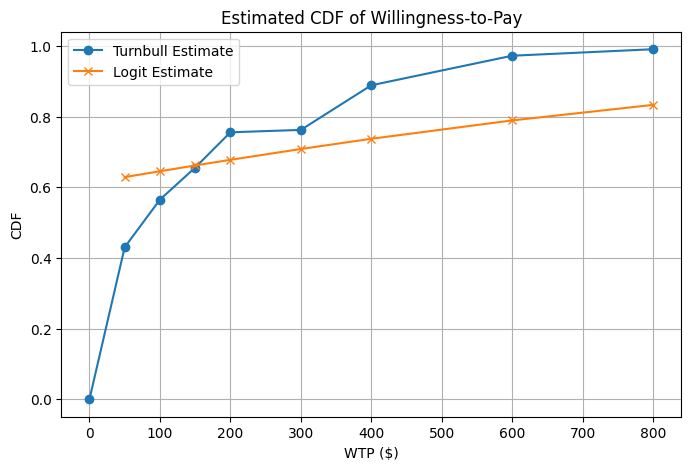

In [25]:
# Assuming your Turnbull survivor data is in WTP_em from before:
# If not, re-run this:

F_em = list(F_em)
F_em.insert(0, 0)  # F(0) = 0
turnbull_cdf = pd.DataFrame({
    "WTP": [0, 50, 100, 150, 200, 300, 400, 600, 800],
    "F_Turnbull": F_em
})

# Add the logit-predicted CDF
logit_cdf = pd.DataFrame({
    "WTP": wtp_vals,
    "F_Logit": cdf_logit
})

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(turnbull_cdf["WTP"], turnbull_cdf["F_Turnbull"], label="Turnbull Estimate", marker='o')
plt.plot(logit_cdf["WTP"], logit_cdf["F_Logit"], label="Logit Estimate", marker='x')
plt.xlabel("WTP ($)")
plt.ylabel("CDF")
plt.title("Estimated CDF of Willingness-to-Pay")
plt.legend()
plt.grid(True)
plt.show()


Using my estimated logit model, I constructed an unconditional estimate of the cumulative distribution function (CDF) of willingness-to-pay (WTP) at a set of dollar values: 50, 100, 150, 200, 300, 400, 600, and 800. For each of these points, I calculated the predicted probability of **accepting** the bid at the sample average values of `Income` and `Concern`, and then converted this to a CDF value as $F(y) = 1 - \Pr(\text{Accept at } y)$.

I then compared this logit-based CDF to the **nonparametric Turnbull estimate** I computed earlier.

The two CDFs show similar trends, especially in the central part of the distribution (e.g., between $50 and $300), where most of the WTP mass lies. However, the **Turnbull estimate is more step-like**, reflecting the interval-censored nature of the data, while the **logit estimate is smooth** due to the parametric form. At higher values (e.g., $600 and $800), the logit model tends to **decay more gradually**, while the Turnbull estimate drops sharply — suggesting the logit model may smooth over extreme values.

This comparison highlights a trade-off: Turnbull is flexible and data-driven, but rough; logit is smooth and interpretable, but assumes a specific functional form.

## Step 5

Discuss some of the advantages and disadvantages of parametric contingent valuation relative to the "nonparametric" approach taken in part 1.

In this assignment, I implemented both a **parametric** (logit) and a **nonparametric** (Turnbull) approach to estimate the distribution of willingness-to-pay (WTP) for a pollution abatement project. Each method has its own strengths and limitations.

The **parametric approach**, using a logit model, allows me to incorporate respondent attributes like income and environmental concern directly into the estimation. This makes it possible to explain heterogeneity in WTP across individuals and to simulate how WTP might change in different subpopulations. The model is also smooth and continuous, which makes interpretation and extrapolation easier. However, it comes with strong assumptions — particularly about the functional form (logistic) and the distribution of error terms. If the true relationship between covariates and WTP is non-logistic or nonlinear, the model may be misspecified and produce biased estimates.

In contrast, the **nonparametric Turnbull estimator** doesn’t assume any specific functional form for the distribution of WTP. It uses only the information directly implied by the observed survey responses and the randomized bids, which makes it very robust. Turnbull is ideal when I want to make minimal assumptions and let the data speak for itself. But it also has downsides: it cannot incorporate covariates, it produces a step-function rather than a smooth curve, and it's less helpful for understanding the drivers of WTP.

In short, the parametric method is more flexible for policy simulation and individual-level prediction, but more sensitive to model assumptions. The nonparametric method is more cautious and assumption-free, but less informative about why people are willing to pay what they do.

# Part 3: Reflection

Read the three articles in the 2012 *Journal of Economic Perspectives* symposium on contingent valuation. They can be found online [here](https://www.aeaweb.org/issues/288). Write a five paragraph reaction to the arguments made in the symposium. Do you feel as though contingent valuation has a role to play in public policy and/or legal decision-making? You may write your response in a markdown box below.

Reading the three articles in the 2012 *Journal of Economic Perspectives* symposium gave me a much more nuanced view of contingent valuation (CV). I used to think of CV mostly as a technical tool — a way to get numbers when markets don’t exist — but the debate made me realize it’s also deeply tied to philosophical and legal questions about how we value public goods. What stood out to me the most was how the authors don’t actually disagree on everything. Everyone seems to acknowledge that CV has limitations, but the disagreement lies in how severe those limitations are, and whether they make CV fundamentally unusable.

Hausman’s critique is sharp and direct. He argues that the method is not just flawed in practice but structurally unreliable. His emphasis on the hypothetical nature of CV — that people often give answers that don’t reflect real behavior — made sense to me, especially in light of the inconsistencies we saw in survey responses during the Turnbull exercise. But at the same time, I found his tone a bit dismissive. Just because a method isn’t perfect doesn’t necessarily mean it should be thrown out completely, especially when we have no market data for many public goods.

In contrast, Carson defends CV with a lot of practical experience. What I appreciated about his argument is that it’s grounded in actual implementations and empirical results. He doesn’t claim CV is flawless, but he makes a strong case that, under the right conditions, it can produce useful and valid estimates. I was particularly interested in his emphasis on how much progress has been made in CV design — better surveys, better modeling, and more realistic scenarios. It reminded me of how much design matters in getting good data, even from imperfect instruments.

Kling, Phaneuf, and Zhao offer more of a middle ground. Their framing — “has some number become better than no number?” — really captures the tension I felt throughout the readings. I understand the appeal of having some estimate when courts or policymakers demand a value, even if that estimate has uncertainty. Their paper helped me see CV not just as an economic tool, but as part of a broader policy process where transparency and humility might be more important than precision.

Overall, I do think contingent valuation has a role to play in public policy and legal decision-making, but with clear caveats. It shouldn’t be the only input, and we need to be honest about its limitations. But when designed carefully and interpreted cautiously, CV can provide a structured way to quantify preferences for things we all care about but can’t buy — like clean air, protected ecosystems, or the cultural value of a place. I think the alternative — pretending those values don’t exist just because we can’t price them easily — would be worse.
